In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [3]:
# Loading dataset
df = pd.read_csv('/content/data (1).csv' , index_col=False)
print(df.head(5))
print(df.shape)

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
# data preprocessing
df['diagnosis'] = df['diagnosis'].apply(lambda x : '1' if x == 'M' else '0')
df = df.set_index('id')
del df['Unnamed: 32']
print(df.shape)


(569, 31)


In [6]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


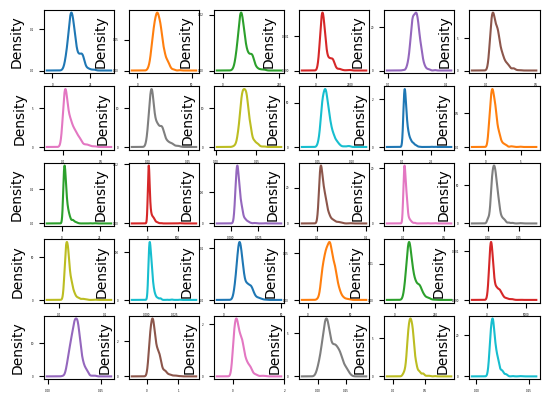

In [7]:
# data visualization
df.plot(kind='density', subplots=True, layout=(5,6), sharex=False, legend=False, fontsize=2)
plt.show()

<ipython-input-8-d9c8046bdf20>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet', 30)
<ipython-input-8-d9c8046bdf20>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)


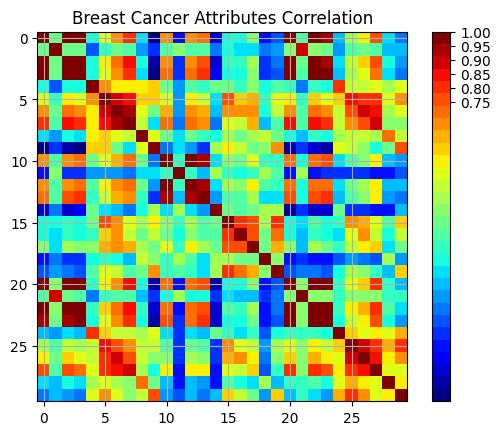

'\nIt is good to check the correlations between the attributes. From the output graph below,\nThe red around the diagonal suggests that attributes are correlated with each other. The \nyellow and green patches suggest some moderate correlation and the blue boxes show \nnegative correlations.\n'

In [8]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

'''
It is good to check the correlations between the attributes. From the output graph below,
The red around the diagonal suggests that attributes are correlated with each other. The
yellow and green patches suggest some moderate correlation and the blue boxes show
negative correlations.
'''

In [9]:
# splitting into training and test sets
Y = df['diagnosis'].values
print(type(Y))
print(Y.shape)
X = df.drop(['diagnosis'] , axis = 1).values
print(X.shape)

X_train , X_test , Y_train , Y_test  = train_test_split(X , Y , test_size = 0.2 , random_state = 15)

<class 'numpy.ndarray'>
(569,)
(569, 30)


In [10]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM' , SVC()))
models_list.append(('NB' , GaussianNB()))
models_list.append(('KNN' , KNeighborsClassifier()))

In [12]:
num_folds = 10
results = []
names = []

for name , model in models_list:
    kfold = KFold(n_splits = num_folds )
    start = time.time()
    cv_results = cross_val_score(model , X_train , Y_train , cv = kfold , scoring = 'accuracy')
    end = time.time()
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f) (run time: %f)" %(name, cv_results.mean(), cv_results.std(), end-start))

CART: 0.925217 (0.046477) (run time: 0.093375)
SVM: 0.925266 (0.027974) (run time: 0.059149)
NB: 0.951594 (0.023672) (run time: 0.022852)
KNN: 0.936184 (0.018513) (run time: 0.137907)


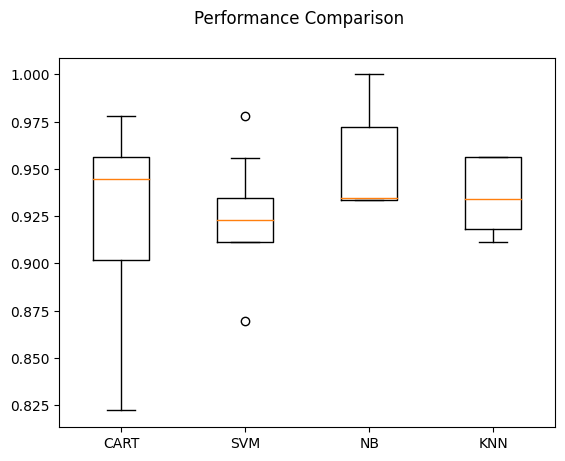

In [13]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [15]:
#Evaluation of algorithm on Standardised dataset

import warnings

pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
                                                                        DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
                                                                      GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
                                                                       KNeighborsClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits = num_folds)
    for name , model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model , X_train , Y_train , cv = kfold , scoring = 'accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print("%s: %f (%f) (run time: %f)" % (name , cv_results.mean() , cv_results.std() , end-start))

ScaledCART: 0.936184 (0.042411) (run time: 0.096122)
ScaledSVM: 0.969275 (0.022249) (run time: 0.078660)
ScaledNB: 0.949372 (0.024407) (run time: 0.039240)
ScaledKNN: 0.969324 (0.026251) (run time: 0.089943)


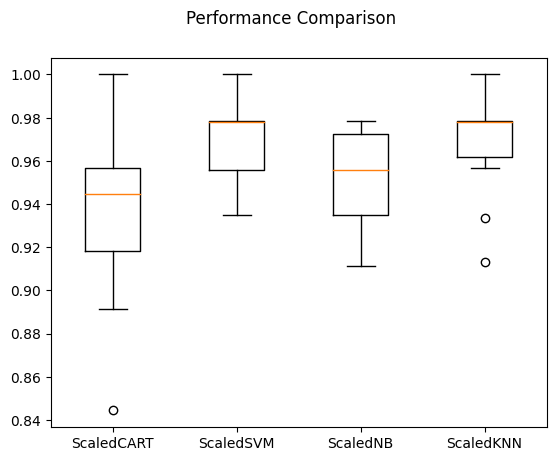

In [16]:
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [20]:
# tuning SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1 , 0.3 , 0.5 , 0.7 , 0.9 , 1.0 , 1.3 , 1.5 , 1.7 , 2.0]
kernel_values = ['linear' , 'poly' , 'rbf' , 'sigmoid']
param_grid = dict(C = c_values , kernel = kernel_values)
model = SVC()
kfold = KFold(n_splits = num_folds )
grid = GridSearchCV(estimator = model , param_grid = param_grid , scoring = 'accuracy' , cv = kfold)
grid_result = grid.fit(rescaledX , Y_train)
print("Best : %f using %s" % (grid_result.best_score_ , grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best : 0.982367 using {'C': 0.1, 'kernel': 'linear'}
0.982367 (0.016592) with: {'C': 0.1, 'kernel': 'linear'}
0.833140 (0.048830) with: {'C': 0.1, 'kernel': 'poly'}
0.949517 (0.021903) with: {'C': 0.1, 'kernel': 'rbf'}
0.953865 (0.030138) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.982319 (0.013302) with: {'C': 0.3, 'kernel': 'linear'}
0.879324 (0.040308) with: {'C': 0.3, 'kernel': 'poly'}
0.960531 (0.021324) with: {'C': 0.3, 'kernel': 'rbf'}
0.967053 (0.014624) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.973575 (0.013257) with: {'C': 0.5, 'kernel': 'linear'}
0.894589 (0.032249) with: {'C': 0.5, 'kernel': 'poly'}
0.971449 (0.016994) with: {'C': 0.5, 'kernel': 'rbf'}
0.960483 (0.019046) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.977971 (0.017091) with: {'C': 0.7, 'kernel': 'linear'}
0.901208 (0.026200) with: {'C': 0.7, 'kernel': 'poly'}
0.973671 (0.019010) with: {'C': 0.7, 'kernel': 'rbf'}
0.956039 (0.024173) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.975797 (0.018259) with: {'C': 0.9, 'kernel': 'lin

In [21]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, Y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.008409


In [22]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [23]:
print("Accuracy score %f" % accuracy_score(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy score 0.956140
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        75
           1       0.97      0.90      0.93        39

    accuracy                           0.96       114
   macro avg       0.96      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [24]:
print(confusion_matrix(Y_test, predictions))

[[74  1]
 [ 4 35]]
